<a href="https://colab.research.google.com/github/U-Aravindhakumar/Anomaly-Detection-for-Proactive-Maintenance/blob/main/Anomaly_Detection_for_Proactive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

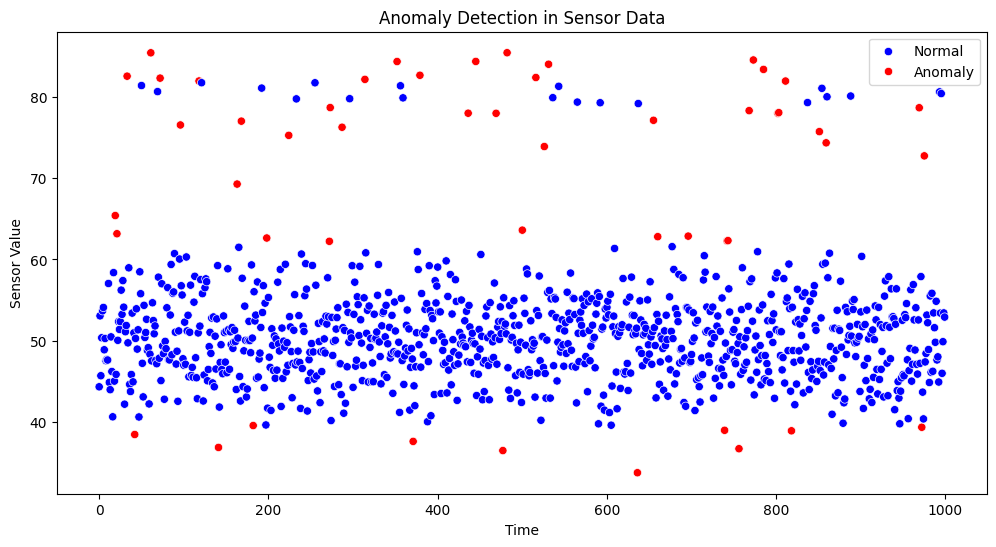

Anomaly detection completed. Results saved in 'detected_anomalies.csv'.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('sensor_data.csv')

# Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['sensor_value']])

# Train Isolation Forest Model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df_scaled)

# Visualizing the Anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df['sensor_value'], hue=df['anomaly'], palette={1:'blue', -1:'red'})
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title('Anomaly Detection in Sensor Data')
plt.legend(['Normal', 'Anomaly'])
plt.show()

# Save detected anomalies
df_anomalies = df[df['anomaly'] == -1]
df_anomalies.to_csv('detected_anomalies.csv', index=False)

print("Anomaly detection completed. Results saved in 'detected_anomalies.csv'.")
